# Customer Segmentation and Recommendation System Project

## Introduction

In this project, we aim to enhance marketing strategies and increase sales for an online retail business by analyzing transactional data from a UK-based retailer. The dataset, which spans from 2010 to 2011, contains detailed information about customer purchases, including transaction dates, product descriptions, quantities, and prices.

### Project Objectives

1. Customer Segmentation: To group customers into distinct segments based on their purchasing behavior using the K-means clustering algorithm. This segmentation will allow the business to tailor marketing strategies to different customer groups effectively.
2. Recommendation System: To develop a recommendation system that suggests top-selling products to customers within each segment who have not yet purchased those items. This will help boost sales and enhance customer satisfaction by providing personalized product recommendations.

## Data Overview

The dataset includes key information that helps us understand customer behavior and product preferences. Some of the most relevant features are:

* InvoiceNo: Unique identifier for each transaction.
* StockCode: Unique identifier for each product.
* Description: A brief description of the product.
* Quantity: Number of products purchased in each transaction.
* InvoiceDate: The date when the transaction occurred.
* UnitPrice: Price per product unit.
* CustomerID: Unique identifier for each customer.
* Country: The country where the customer is based.

## Data Preprocessing

To ensure the dataset is suitable for analysis, we will clean and preprocess the data by:

* Handling missing or null values, especially in crucial fields like `CustomerID`.
* Removing duplicate entries or erroneous records (e.g., transactions with negative quantities).
* Converting the `InvoiceDate` to a more usable format, such as extracting year, month, and day features.

## Feature Engineering

To create customer-level insights, we will engineer the following features:

* Recency: The time since a customer's last purchase.
* Frequency: The total number of purchases made by the customer.
* Monetary Value: The total amount spent by the customer.

These features will allow us to perform clustering and distinguish between different customer groups.

## Customer Segmentation

Using the K-means clustering algorithm, we will group customers based on the engineered features. This step will help us understand customer behavior patterns, such as:

* High-frequency buyers vs. occasional buyers.
* High spenders vs. low spenders.
* Recency of the last purchase.
* By identifying these distinct segments, the business can adjust its marketing strategies, such as offering promotions or discounts to * retain valuable customers or re-engaging dormant customers.

## Recommendation System

After segmentation, we will build a recommendation system that:

* Identifies the top-selling products in each segment.
* Recommends these products to customers who haven’t yet purchased them.
* This system will enhance the shopping experience by helping customers discover relevant products while also increasing sales for the business.

### Step 1: Data Understanding and Exploration

In this first step of the project, we will explore the dataset to understand its structure, 
identify any data quality issues, and gain insights into the key features that will be used 
for customer segmentation and recommendations. This exploratory analysis will provide us 
with an initial understanding of the data, helping to inform subsequent steps such as 
feature engineering and model building.

#### The main tasks in this step include:
- **Loading the dataset** into a pandas DataFrame for analysis.
- **Initial inspection** of the data to examine its structure, column names, and data types.
- **Checking for missing values** and analyzing the distribution of different features.
- **Reviewing basic statistics** such as mean, median, and distribution for numerical features.
- **Identifying categorical features** and understanding their potential use in segmentation and recommendations.
- **Inspecting anomalies** like negative values for quantity or price and handling them as needed.
- **Visualizing key distributions** to better understand the data patterns and relationships.

By thoroughly understanding the dataset, we will lay the foundation for effective data preprocessing, 
feature engineering, and model development in the subsequent steps of the project.

In [57]:
# Import packages and libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [58]:
# Step 1: Data Understanding and Exploration

# Load the dataset into a pandas DataFrame
file_path = 'data/retail-data.csv'
df = pd.read_csv(file_path)

In [59]:
# Initial inspection of the dataset
print("Dataset Info:")
print(df.info())  # This will show column names, data types, and non-null counts

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [60]:
print("\nFirst few rows of the dataset:")
print(df.head())  # Display the first few rows to get an overview of the data


First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [61]:
# Check for missing values
print("\nMissing values count per column:")
print(df.isnull().sum())  # Summarize missing values for each column


Missing values count per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [62]:
# Generate basic statistics for numerical columns
print("\nSummary statistics for numerical features:")
print(df.describe())  # Shows mean, median, standard deviation, and other metrics


Summary statistics for numerical features:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [63]:
# Check the distribution of categorical features (if applicable)
print("\nUnique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
InvoiceNo: 25900 unique values
StockCode: 4070 unique values
Description: 4223 unique values
InvoiceDate: 23260 unique values
Country: 38 unique values


In [64]:
# Checking for anomalies (e.g., negative quantities or unit prices)
print("\nChecking for negative quantities or unit prices:")
negative_values = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]
print(f"Number of rows with negative values: {negative_values.shape[0]}")


Checking for negative quantities or unit prices:
Number of rows with negative values: 10626


### Step 2: Data Preprocessing

In this step, we will clean and preprocess the data to ensure it is ready for feature engineering and modeling. 
The following actions will be taken:
- **Handling Missing Values**: We will drop rows where `CustomerID` is missing, as these transactions cannot be associated with a customer for segmentation. We will also remove rows with missing values in the `Description` column, as it is not essential for segmentation.
- **Removing Negative Values**: We will remove rows where `Quantity` or `UnitPrice` is negative, assuming these represent returns or data entry errors that are not useful for the scope of this project.
- **Dropping the Description Column**: Since the `Description` column is not relevant for our analysis, we will drop it from the dataset.
- **Converting Date Columns**: We will convert the `InvoiceDate` column to a datetime format to facilitate time-based analysis (e.g., calculating recency).
- **Handling Outliers**: If any extreme outliers significantly skew the analysis, we will consider removing or capping them.

In [65]:
# Step 2: Data Preprocessing

# 1. Drop rows with missing CustomerID as these cannot be used for customer segmentation
df_cleaned = df.dropna(subset=['CustomerID'])

# 2. Drop rows with missing Description (not needed for our analysis)
df_cleaned = df_cleaned.dropna(subset=['Description'])

# 3. Remove negative Quantity and UnitPrice values, assuming they represent returns or data errors
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# 4. Drop the Description column, as it's not necessary for segmentation or recommendation
df_cleaned = df_cleaned.drop(columns=['Description'])

# 5. Convert InvoiceDate to datetime format for time-based analysis
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# 6. Optional: Reset the index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

In [66]:
# Summary of the cleaned data
print("Data after preprocessing:")
print(df_cleaned.info())
print("\nFirst few rows of cleaned data:")
print(df_cleaned.head())

Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Quantity     397884 non-null  int64         
 3   InvoiceDate  397884 non-null  datetime64[ns]
 4   UnitPrice    397884 non-null  float64       
 5   CustomerID   397884 non-null  float64       
 6   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.2+ MB
None

First few rows of cleaned data:
  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55     17850.0   
1    536365     71053         6 2010-12-01 08:26:00       3.39     17850.0   
2    536365    84406B         8 2010-12-01 08:26:00       2.

### Step 3: Feature Engineering

In this step, we will create customer-centric features that will be essential for segmentation using the RFM (Recency, Frequency, Monetary) model. These features will capture the purchasing behavior of each customer, summarizing their activity into three key metrics:

- **Recency**: How recently a customer made their last purchase. This will be calculated by finding the difference between the last transaction date in the dataset and each customer’s most recent purchase date.
- **Frequency**: The total number of transactions made by each customer. This will be measured by counting the number of unique invoices per customer.
- **Monetary Value**: The total amount of money spent by each customer, computed by summing the product of `Quantity` and `UnitPrice` for each customer’s transactions.

Once these features are created, the data will be aggregated at the customer level for segmentation. We will also inspect the distributions of these new features to understand customer behavior patterns before proceeding to clustering.

Steps:
1. Calculate **Recency**, **Frequency**, and **Monetary Value** for each customer.
2. Aggregate the data by `CustomerID` to create a customer-level DataFrame.
3. Analyze and inspect the distributions of these features to ensure they make sense for segmentation.

In [67]:
# Step 3: Feature Engineering

# 1. Set a reference date for calculating recency (maximum InvoiceDate in the dataset)
latest_date = df_cleaned['InvoiceDate'].max()

In [68]:
# 2. Create a customer-level DataFrame
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency: days since last purchase
    'InvoiceNo': 'nunique',  # Frequency: number of unique invoices
    'Quantity': 'sum',  # Total Quantity purchased by the customer
    'UnitPrice': 'mean'  # Average Unit Price (optional, to explore pricing sensitivity)
})

# Rename columns for clarity
rfm.columns = ['Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice']

In [69]:
# 3. Calculate the Monetary Value by multiplying UnitPrice and Quantity in each transaction
df_cleaned['Monetary'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
monetary = df_cleaned.groupby('CustomerID')['Monetary'].sum()  # Sum Monetary values for each customer

In [70]:
# 4. Merge the monetary feature back into the RFM DataFrame
rfm = rfm.merge(monetary, on='CustomerID')

In [71]:
# 5. Optional: Calculate additional features like Average Order Value, Product Diversity
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']  # Average order value
product_diversity = df_cleaned.groupby('CustomerID')['StockCode'].nunique()  # Number of unique products purchased
rfm = rfm.merge(product_diversity, on='CustomerID', how='left').rename(columns={'StockCode': 'ProductDiversity'})

In [72]:
# Summary of the engineered features
print("RFM Customer-level DataFrame:")
print(rfm.head())

RFM Customer-level DataFrame:
            Recency  Frequency  TotalQuantity  AvgUnitPrice  Monetary  \
CustomerID                                                              
12346.0         325          1          74215      1.040000  77183.60   
12347.0           1          7           2458      2.644011   4310.00   
12348.0          74          4           2341      5.764839   1797.24   
12349.0          18          1            631      8.289041   1757.55   
12350.0         309          1            197      3.841176    334.40   

            AvgOrderValue  ProductDiversity  
CustomerID                                   
12346.0      77183.600000                 1  
12347.0        615.714286               103  
12348.0        449.310000                22  
12349.0       1757.550000                73  
12350.0        334.400000                17  


In [73]:
# Descriptive statistics for the RFM features
print("\nSummary statistics for RFM features:")
print(rfm.describe())


Summary statistics for RFM features:
           Recency    Frequency  TotalQuantity  AvgUnitPrice       Monetary  \
count  4338.000000  4338.000000    4338.000000   4338.000000    4338.000000   
mean     91.536422     4.272015    1191.289073      4.467773    2054.266460   
std     100.014169     7.697998    5046.081546     34.211451    8989.230441   
min       0.000000     1.000000       1.000000      0.122500       3.750000   
25%      17.000000     1.000000     160.000000      2.203728     307.415000   
50%      50.000000     2.000000     379.000000      2.917611     674.485000   
75%     141.000000     5.000000     992.750000      3.829784    1661.740000   
max     373.000000   209.000000  196915.000000   2033.100000  280206.020000   

       AvgOrderValue  ProductDiversity  
count    4338.000000       4338.000000  
mean      419.166289         61.501153  
std      1796.537944         85.366768  
min         3.450000          1.000000  
25%       178.625000         16.000000  
50% 

### Step 4: Customer Segmentation using K-Means (with 2D and 3D PCA Visualization)

In this step, we will segment customers based on the Recency, Frequency, and Monetary (RFM) features that we engineered in the previous step. The K-Means clustering algorithm will be applied to identify distinct customer groups.. In addition to performing customer segmentation using K-Means, we will visualize the resulting clusters in both 2D and 3D using **PCA (Principal Component Analysis)**. By reducing the high-dimensional data to 2 or 3 components, we can better understand how the customers are grouped into distinct segments.

#### Key Steps:
1. **Feature Scaling**: We will scale the features using StandardScaler.
2. **Elbow Method**: We will determine the optimal number of clusters for K-Means.
3. **K-Means Clustering**: We will apply the K-Means algorithm with the optimal number of clusters.
4. **2D PCA Visualization**: We will use PCA to project the data into two dimensions and visualize the clusters.
5. **3D PCA Visualization**: We will extend the PCA to three dimensions for a more detailed view of the clusters in 3D space.

In [74]:
# Step 4: Customer Segmentation using K-Means

# 1. Feature Scaling
# Selecting RFM and additional features for clustering
features = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'ProductDiversity']
X = rfm[features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

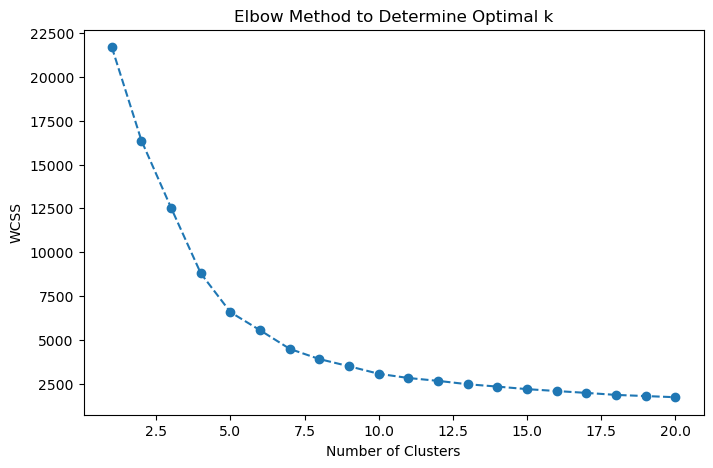

In [75]:
# 2. Determine Optimal Number of Clusters using the Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow plot, choose the optimal number of clusters (e.g., k=4 or 5)
optimal_clusters = 4  # This will be determined from the elbow plot

In [76]:
# 3. Apply K-Means Clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

In [77]:
# 4. Analyze the Cluster Characteristics
cluster_analysis = rfm.groupby('Cluster').mean()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_analysis)

Cluster Characteristics:
            Recency  Frequency  TotalQuantity  AvgUnitPrice       Monetary  \
Cluster                                                                      
0         38.802326   4.864865    1187.115651      4.221122    2000.000809   
1        240.065905   1.558875     282.576450      5.152847     545.637338   
2        162.500000   1.500000   77606.000000      1.350000  122828.050000   
3          6.000000  79.687500   57101.625000      5.184282  105050.871250   

         AvgOrderValue  ProductDiversity  
Cluster                                   
0           389.608263         71.589881  
1           337.057120         23.805800  
2         80709.925000          2.000000  
3          2101.188574        743.625000  


In [78]:
# 5. Visualization of Clusters using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add PCA components to the RFM DataFrame
rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]

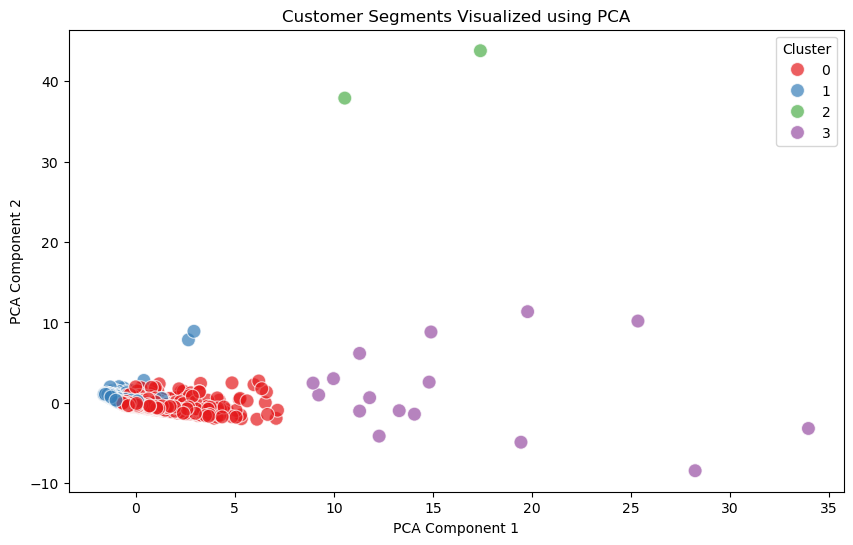

In [79]:
# Plot the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

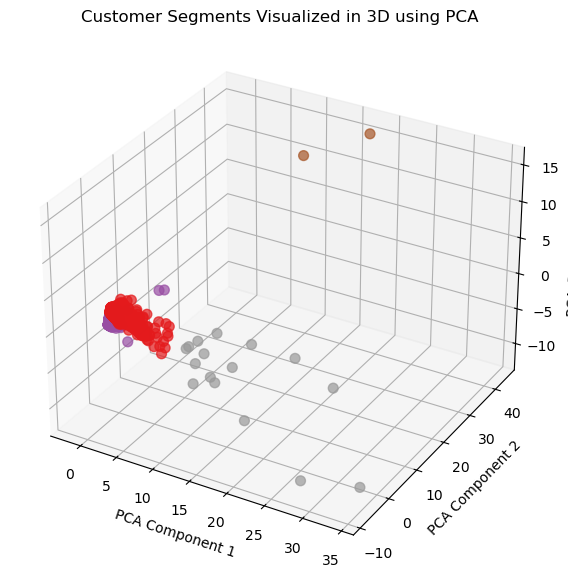

In [80]:
# 6. PCA for 3D Visualization
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(X_scaled)

# Add 3D PCA components to the RFM DataFrame
rfm['PCA3'] = pca_components_3d[:, 2]

# 7. 3D Plot of the Clusters using PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters in 3D
ax.scatter(rfm['PCA1'], rfm['PCA2'], rfm['PCA3'], c=rfm['Cluster'], cmap='Set1', s=50, alpha=0.7)

# Setting labels and title for the 3D plot
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Customer Segments Visualized in 3D using PCA')

plt.show()

### Step 5: Outlier Detection and Removal

We will use the Interquartile Range (IQR) method to detect and remove outliers in the dataset. Outliers are data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Removing these extreme values will result in a more balanced distribution of customers across clusters.

The steps include:
1. Calculate the IQR for `Recency`, `Frequency`, `Monetary`, and `TotalQuantity`.
2. Define lower and upper bounds based on the IQR method.
3. Filter out customers whose values for these features fall outside the bounds.
4. Re-apply K-Means clustering to the cleaned dataset.

In [81]:
# Step 5: Outlier Detection and Removal using IQR Method

# Define a function to detect outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to the relevant columns
rfm_no_outliers = rfm.copy()
columns_to_check = ['Recency', 'Frequency', 'Monetary', 'TotalQuantity']

for column in columns_to_check:
    rfm_no_outliers = remove_outliers(rfm_no_outliers, column)

# Print the shape before and after outlier removal
print(f"Original dataset size: {rfm.shape[0]}")
print(f"Dataset size after outlier removal: {rfm_no_outliers.shape[0]}")

Original dataset size: 4338
Dataset size after outlier removal: 3413


In [82]:
# Re-apply K-Means after outlier removal
X_no_outliers = rfm_no_outliers[features]
X_scaled_no_outliers = scaler.fit_transform(X_no_outliers)

# Recalculate optimal clusters if needed (reuse previous optimal k or re-run elbow method)
optimal_clusters = 4  # Based on previous analysis, you can change this if needed
kmeans_no_outliers = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm_no_outliers['Cluster'] = kmeans_no_outliers.fit_predict(X_scaled_no_outliers)

# Analyze cluster characteristics after outlier removal
cluster_analysis_no_outliers = rfm_no_outliers.groupby('Cluster').mean()
print("Cluster Characteristics after Outlier Removal:")
print(cluster_analysis_no_outliers)

Cluster Characteristics after Outlier Removal:
            Recency  Frequency  TotalQuantity  AvgUnitPrice     Monetary  \
Cluster                                                                    
0        227.120048   1.454982     184.494598      4.897167   329.158391   
1        101.115385   1.569231     691.876923     11.406048  1318.403500   
2         48.082506   2.033499     296.790323      3.638484   484.430058   
3         35.977401   5.381356     858.882768      3.155892  1576.466441   

         AvgOrderValue  ProductDiversity      PCA1      PCA2      PCA3  
Cluster                                                                 
0           237.672983         20.428571 -0.987783  0.529142 -0.996913  
1           904.637260         48.476923 -0.306590  0.311261  0.150176  
2           251.394613         30.706576 -0.339987 -0.166869  0.509065  
3           316.782362         95.467514  0.426609 -0.394930  0.356103  


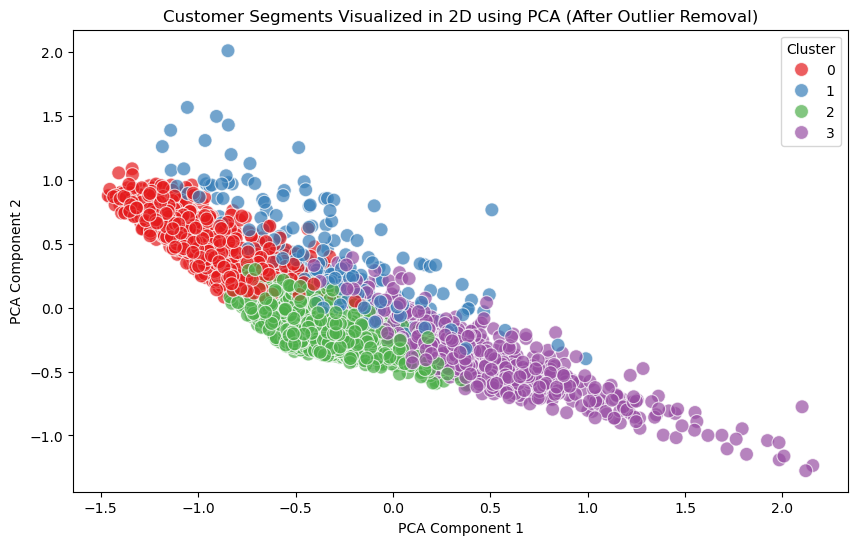

In [84]:
# 2D Visualization of clusters after outlier removal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm_no_outliers, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments Visualized in 2D using PCA (After Outlier Removal)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()